In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import HashingVectorizer
from nltk.corpus import stopwords

In [39]:
stopwords.words('swedish')

['och',
 'det',
 'att',
 'i',
 'en',
 'jag',
 'hon',
 'som',
 'han',
 'på',
 'den',
 'med',
 'var',
 'sig',
 'för',
 'så',
 'till',
 'är',
 'men',
 'ett',
 'om',
 'hade',
 'de',
 'av',
 'icke',
 'mig',
 'du',
 'henne',
 'då',
 'sin',
 'nu',
 'har',
 'inte',
 'hans',
 'honom',
 'skulle',
 'hennes',
 'där',
 'min',
 'man',
 'ej',
 'vid',
 'kunde',
 'något',
 'från',
 'ut',
 'när',
 'efter',
 'upp',
 'vi',
 'dem',
 'vara',
 'vad',
 'över',
 'än',
 'dig',
 'kan',
 'sina',
 'här',
 'ha',
 'mot',
 'alla',
 'under',
 'någon',
 'eller',
 'allt',
 'mycket',
 'sedan',
 'ju',
 'denna',
 'själv',
 'detta',
 'åt',
 'utan',
 'varit',
 'hur',
 'ingen',
 'mitt',
 'ni',
 'bli',
 'blev',
 'oss',
 'din',
 'dessa',
 'några',
 'deras',
 'blir',
 'mina',
 'samma',
 'vilken',
 'er',
 'sådan',
 'vår',
 'blivit',
 'dess',
 'inom',
 'mellan',
 'sådant',
 'varför',
 'varje',
 'vilka',
 'ditt',
 'vem',
 'vilket',
 'sitta',
 'sådana',
 'vart',
 'dina',
 'vars',
 'vårt',
 'våra',
 'ert',
 'era',
 'vilkas']

In [40]:
df = pd.read_csv('train.csv')

In [41]:
df.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
5,ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
6,5a0f4908a0,ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی...,ہیگ کی تفتیش ایف بی آئی اہلکاروں کی طرف سے کی...,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,Через каждые сто градусов пятна краски меняют ...,Краска изменяется в соответствии с цветом.,ru,Russian,0


In [42]:
df['language'].unique()

array(['English', 'French', 'Thai', 'Turkish', 'Urdu', 'Russian',
       'Bulgarian', 'German', 'Arabic', 'Chinese', 'Hindi', 'Swahili',
       'Vietnamese', 'Spanish', 'Greek'], dtype=object)

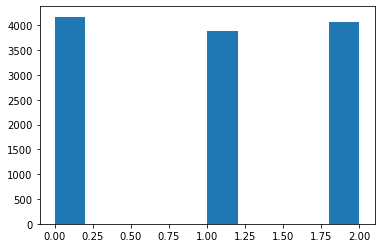

In [43]:
plt.hist(df['label']);
#just about equal parts for each outcome, although a few less 1 (entails) values

## Let's do some vectoring for kicks

In [47]:
vector_df = pd.DataFrame(columns = ['id','premise','hypothesis','label'])
for line in df.iterrows():
    vectorizer = HashingVectorizer(stop_words= stopwords.words(f'{line[1]["language"].lower()}'))
    vector_df = vector_df.append({'id': line[1]['id'] , 'premise' : vectorizer.fit_transform([line[1]['premise']]),
                      'hypothesis': vectorizer.transform([line[1]['hypothesis']]), 'label': line[1]['id']},
                    ignore_index = True)

/Users/bramblepatch/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['กล', 'กว', 'คร', 'งจาก', 'งน', 'งแต', 'ดเผย', 'นการ', 'พร', 'ยว', 'ยวก', 'ระหว', 'ลง', 'วง', 'วน', 'วม', 'วย', 'หน', 'หร', 'หล', 'หลาย', 'หาก', 'อง', 'องจาก', 'อน', 'อม', 'อย', 'อยาก', 'ออก', 'อะไร', 'อาจ', 'าง', 'างๆ', 'าน', 'าว', 'าหร', 'เข', 'เขา', 'เคย', 'เฉพาะ', 'เช', 'เด', 'เน', 'เป', 'เพ', 'เพราะ', 'เม', 'เร', 'เรา', 'เลย', 'เห', 'เอง', 'แต', 'แบบ', 'แรก', 'แล', 'และ', 'แห', 'โดย', 'ใน', 'ให', 'ได', 'ไป', 'ไม', 'ไว'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/bramblepatch/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آش', 'ئی', 'ئے', 'او', 'اٹھب', 'اپ', 'بة', 'بت', 'ب

In [46]:
vector_df.head()

,id,premise,hypothesis,label,Premise
0,5130fd2cb5,NaN,"(0, 313735)\t-0.3779644730092272\n (0, 5657...",5130fd2cb5,"(0, 160333)\t0.4472135954999579\n (0, 24488..."
1,5b72532a0b,NaN,"(0, 360924)\t0.4472135954999579\n (0, 44802...",5b72532a0b,"(0, 88926)\t0.3779644730092272\n (0, 448025..."
2,3931fbe82a,NaN,"(0, 331541)\t0.5\n (0, 368310)\t0.5\n (0, ...",3931fbe82a,"(0, 125564)\t-0.31622776601683794\n (0, 230..."
3,5622f0c60b,NaN,"(0, 74087)\t0.7071067811865475\n (0, 427345...",5622f0c60b,"(0, 22218)\t0.2773500981126146\n (0, 59729)..."
4,86aaa48b45,NaN,"(0, 283227)\t-0.3333333333333333\n (0, 3051...",86aaa48b45,"(0, 168236)\t-0.20412414523193154\n (0, 171..."
